[*********************100%%**********************]  1 of 1 completed
                   %K         %D  Signal  Position
Date                                              
2019-10-22  77.283979  76.699577     1.0       1.0
2019-10-24  93.126465  80.965824     1.0       1.0
2019-11-04  74.222363  72.065445     1.0       1.0
2019-11-15  91.162133  86.454028     1.0       1.0
2019-11-19  99.073565  92.255468     1.0       1.0
...               ...        ...     ...       ...
2024-03-15   6.786454   4.035072     1.0       1.0
2024-04-04  44.061318  34.330489     1.0       1.0
2024-04-08  52.527373  38.360227     1.0       1.0
2024-04-11  59.351341  58.565027     1.0       1.0
2024-04-22   8.040574   4.861954     1.0       1.0

[231 rows x 4 columns]
                   %K         %D  Signal  Position
Date                                              
2019-10-23  72.487029  73.973044     0.0      -1.0
2019-10-28  86.894895  92.687751     0.0      -1.0
2019-11-13  83.028884  92.706360     0.0

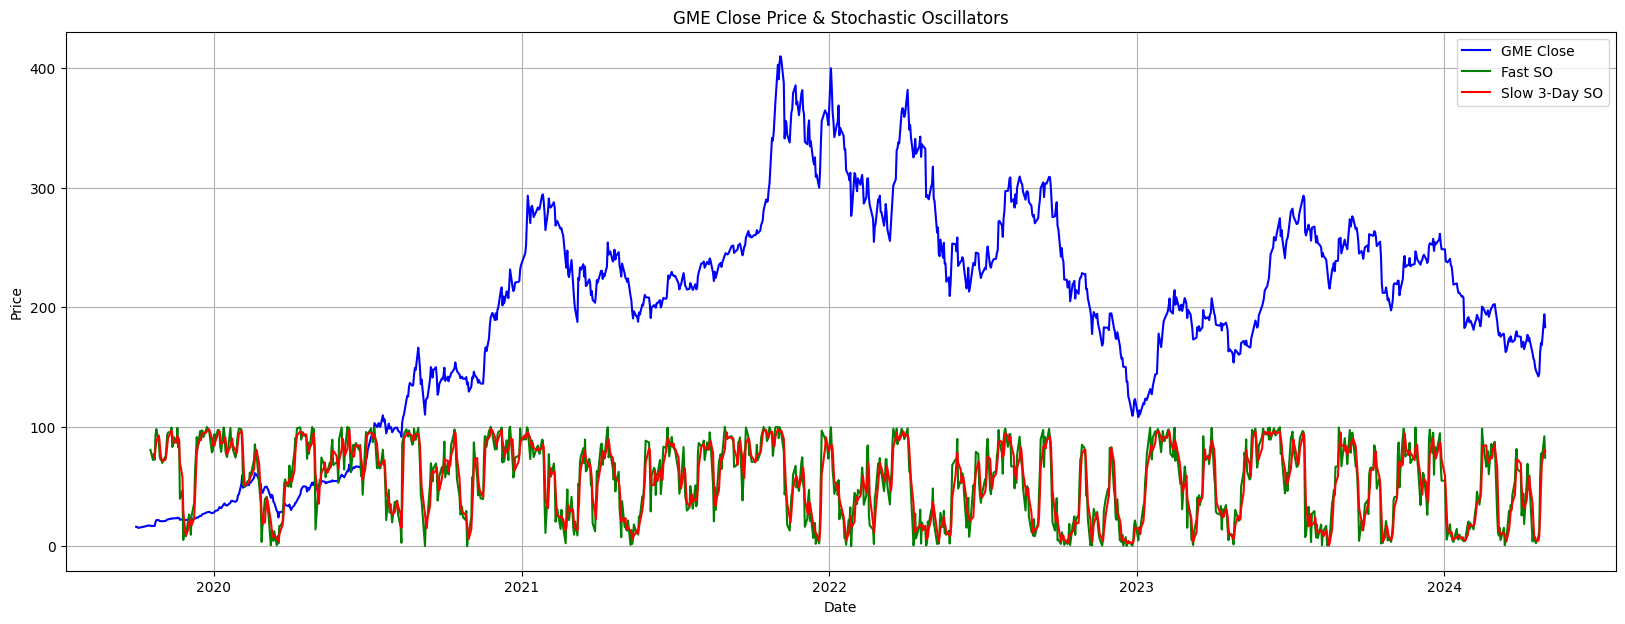

In [3]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#defining the ticker and daterange
ticker1 = "TSLA"
start1 = dt.date(2019, 10, 1)
end1 = dt.date(2024, 5, 1)
ticker1_data = yf.download(ticker1, start = start1, end = end1)
ticker1_data
#fast oscillator (%K) is the value of, slow oscillator (%D) has smoothing of 3 days, trade signals generated when the fast crosses through the slow
#SO usually calculated over a period of 14 days
SO_window = 14
slow_window = 3
#no fast window because it's literally 1 day
#SO calculations
ticker1_data['Lowest'] = ticker1_data['Low'].rolling(window=SO_window).min()
ticker1_data['Highest'] = ticker1_data['High'].rolling(window=SO_window).max()
ticker1_data['%K'] = ((ticker1_data['Close'] - ticker1_data['Lowest']) / (ticker1_data['Highest'] - ticker1_data['Lowest'])) * 100
ticker1_data['%D'] = ticker1_data['%K'].rolling(window=slow_window).mean()
#detect crossovers
crossovers = pd.DataFrame(index=ticker1_data.index)
crossovers['%K'] = ticker1_data['%K']
crossovers['%D'] = ticker1_data['%D']
crossovers['Signal'] = 0.0
crossovers['Signal'] = np.where(crossovers['%K'] > crossovers['%D'], 1.0, 0.0)
# Find crossover points
crossovers['Position'] = crossovers['Signal'].diff()
# Show the dates of the crossovers
print(crossovers.loc[crossovers['Position'] == 1])  # Bullish crossovers
print(crossovers.loc[crossovers['Position'] == -1])  # Bearish crossovers
# Plot the closing price along with the moving averages
plt.figure(figsize=(20, 7))  # Set the figure size
plt.plot(ticker1_data['Close'], label='GME Close', color='blue')  # Plot the closing price
plt.plot(ticker1_data['%K'], label=f'Fast SO', color='green')  # Plot the fast SO
plt.plot(ticker1_data['%D'], label=f'Slow {slow_window}-Day SO', color='red')  # Plot the slow SO
# Add title and labels
plt.title('GME Close Price & Stochastic Oscillators')
plt.xlabel('Date')
plt.ylabel('Price')
# Show the legend
plt.legend()
# Show the grid
plt.grid(True)
# Show the plot
plt.show()